### **Data Overview**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import xgboost as xgb
from sklearn.feature_selection import mutual_info_regression
from scipy.stats import ttest_ind
from sklearn.feature_extraction import DictVectorizer
import re
from sklearn.model_selection import GridSearchCV
from scipy.stats import yeojohnson
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.feature_selection import RFE
from scipy.stats import shapiro
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from scipy.stats import chi2_contingency
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/OnlineArticlesPopularity_Milestone2.csv")

In [ ]:
df.columns

Index(['url', 'title', ' timedelta', ' n_tokens_content', ' n_unique_tokens',
       ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs',
       ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length',
       ' num_keywords', 'channel type', ' kw_min_min', ' kw_max_min',
       ' kw_avg_min', ' kw_min_max', ' kw_max_max', ' kw_avg_max',
       ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg',
       ' self_reference_min_shares', ' self_reference_max_shares',
       ' self_reference_avg_sharess', 'weekday', 'isWeekEnd', ' LDA_00',
       ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_polarity', ' global_rate_positive_words',
       ' global_rate_negative_words', ' rate_positive_words',
       ' rate_negative_words', ' avg_positive_polarity',
       ' min_positive_polarity', ' max_positive_polarity',
       ' avg_negative_polarity', ' min_negative_polarity',
       ' max_negative_polarity', 'Article Popularity'],
      d

In [ ]:
df.shape

(38643, 46)

In [ ]:
df.head()

,url,title,timedelta,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,Article Popularity
0,http://mashable.com/2013/09/30/facebook-graph-...,facebook-graph-search-conversations,465,1011,0.469819,1.0,0.671210,20,5,1,...,0.025717,0.666667,0.333333,0.334834,0.033333,1.0,-0.295833,-1.0,-0.050,Above Average
1,http://mashable.com/2014/07/29/connie-britton-...,connie-britton-geena-rocero-social-good-summit,163,161,0.647799,1.0,0.747368,7,5,3,...,0.018634,0.785714,0.214286,0.291667,0.033333,0.5,-0.275000,-0.4,-0.125,Average
2,http://mashable.com/2013/08/09/how-to-prevent-...,how-to-prevent-porn-sexting,517,207,0.626214,1.0,0.807018,5,2,0,...,0.009662,0.777778,0.222222,0.411395,0.214286,0.5,-0.300000,-0.4,-0.200,Average
3,http://mashable.com/2013/12/10/ed-norton-veriz...,ed-norton-verizon-droid-ad,394,252,0.581301,1.0,0.729730,5,3,1,...,0.000000,1.000000,0.000000,0.313300,0.033333,0.5,0.000000,0.0,0.000,Average
4,http://mashable.com/2014/09/12/oscar-pistorius...,oscar-pistorius-verdict-trial,117,463,0.515419,1.0,0.682657,2,2,1,...,0.036717,0.433333,0.566667,0.265297,0.062500,0.5,-0.227941,-0.8,-0.100,Not Popular


In [ ]:
unique_shares = df['Article Popularity'].unique()

print("Unique values of 'Article Popularity' column:")
print(unique_shares)

Unique values of 'Article Popularity' column:
['Above Average' 'Average' 'Not Popular' 'Very Popular']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38643 entries, 0 to 38642
Data columns (total 46 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          38643 non-null  object 
 1   title                        38643 non-null  object 
 2    timedelta                   38643 non-null  int64  
 3    n_tokens_content            38643 non-null  int64  
 4    n_unique_tokens             38643 non-null  float64
 5    n_non_stop_words            38643 non-null  float64
 6    n_non_stop_unique_tokens    38643 non-null  float64
 7    num_hrefs                   38643 non-null  int64  
 8    num_self_hrefs              38643 non-null  int64  
 9    num_imgs                    38643 non-null  int64  
 10   num_videos                  38643 non-null  int64  
 11   average_token_length        38643 non-null  float64
 12   num_keywords                38643 non-null  int64  
 13  channel type    

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
timedelta,38643.0,354.594726,214.119175,8.00000,164.000000,339.000000,542.000000,731.000000
n_tokens_content,38643.0,547.139611,471.285578,0.00000,247.000000,410.000000,717.000000,8474.000000
n_unique_tokens,38643.0,0.548412,3.565953,0.00000,0.470709,0.539130,0.608302,701.000000
n_non_stop_words,38643.0,0.996972,5.298498,0.00000,1.000000,1.000000,1.000000,1042.000000
n_non_stop_unique_tokens,38643.0,0.689356,3.306746,0.00000,0.625581,0.690411,0.754286,650.000000
num_hrefs,38643.0,10.891390,11.332647,0.00000,4.000000,8.000000,14.000000,304.000000
num_self_hrefs,38643.0,3.296250,3.854513,0.00000,1.000000,3.000000,4.000000,116.000000
num_imgs,38643.0,4.539218,8.308654,0.00000,1.000000,1.000000,4.000000,128.000000
num_videos,38643.0,1.256321,4.131928,0.00000,0.000000,0.000000,1.000000,91.000000
average_token_length,38643.0,4.547656,0.846581,0.00000,4.478383,4.664407,4.855263,8.041534


In [ ]:
df.dtypes

url                             object
title                           object
 timedelta                       int64
 n_tokens_content                int64
 n_unique_tokens               float64
 n_non_stop_words              float64
 n_non_stop_unique_tokens      float64
 num_hrefs                       int64
 num_self_hrefs                  int64
 num_imgs                        int64
 num_videos                      int64
 average_token_length          float64
 num_keywords                    int64
channel type                    object
 kw_min_min                      int64
 kw_max_min                    float64
 kw_avg_min                    float64
 kw_min_max                      int64
 kw_max_max                      int64
 kw_avg_max                    float64
 kw_min_avg                    float64
 kw_max_avg                    float64
 kw_avg_avg                    float64
 self_reference_min_shares     float64
 self_reference_max_shares     float64
 self_reference_avg_share

#### **Duplicates**

In [ ]:
df.duplicated().sum()

0

### **Nulls**

In [ ]:
df.isnull().sum()

url                            0
title                          0
 timedelta                     0
 n_tokens_content              0
 n_unique_tokens               0
 n_non_stop_words              0
 n_non_stop_unique_tokens      0
 num_hrefs                     0
 num_self_hrefs                0
 num_imgs                      0
 num_videos                    0
 average_token_length          0
 num_keywords                  0
channel type                   0
 kw_min_min                    0
 kw_max_min                    0
 kw_avg_min                    0
 kw_min_max                    0
 kw_max_max                    0
 kw_avg_max                    0
 kw_min_avg                    0
 kw_max_avg                    0
 kw_avg_avg                    0
 self_reference_min_shares     0
 self_reference_max_shares     0
 self_reference_avg_sharess    0
weekday                        0
isWeekEnd                      0
 LDA_00                        0
 LDA_01                        0
 LDA_02   

In [ ]:
mode_value = df['channel type'].mode()[0]
df['channel type'] = df['channel type'].replace('[]', mode_value)

In [ ]:
import pickle

with open('mode_value.pkl', 'wb') as f:
    pickle.dump(mode_value, f)

In [ ]:
import pandas as pd
import pickle

mode_values = {
    'isWeekEnd': df['isWeekEnd'].mode()[0],
    'weekday': df['weekday'].mode()[0],
    'channel type': df['channel type'].mode()[0]
}

with open('mode_values.pkl', 'wb') as f:
    pickle.dump(mode_values, f)

 kw_avg_avg                      5.815468
 kw_max_avg                     16.576306
 LDA_02                          1.311984
 LDA_03                          1.240231
 self_reference_avg_sharess     17.883339
 self_reference_min_shares      26.665187
 self_reference_max_shares      13.924262
 LDA_04                          1.173099
 global_subjectivity            -1.380826
 kw_avg_min                     31.236906
 kw_max_min                     35.249817
 num_hrefs                       4.022640
 num_imgs                        3.967581
 num_videos                      7.014902
 LDA_01                          2.084958
 LDA_00                          1.566371
 rate_negative_words             0.408074
 global_sentiment_polarity       0.111154
 num_keywords                   -0.150924
 global_rate_positive_words      0.323173
 rate_positive_words            -1.426985
 kw_avg_max                      0.625861
 n_non_stop_unique_tokens      195.937404
 min_positive_polarity           3

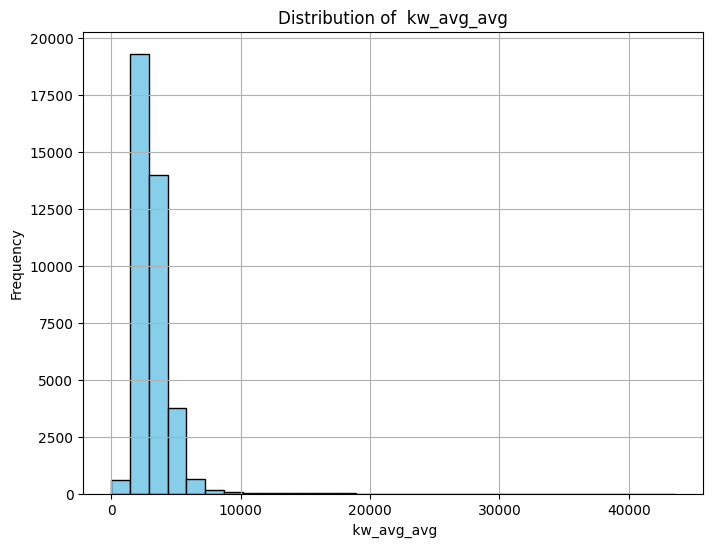

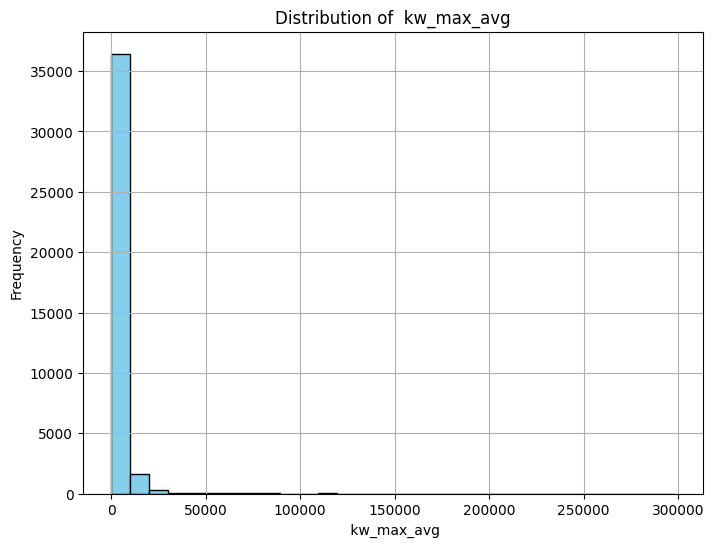

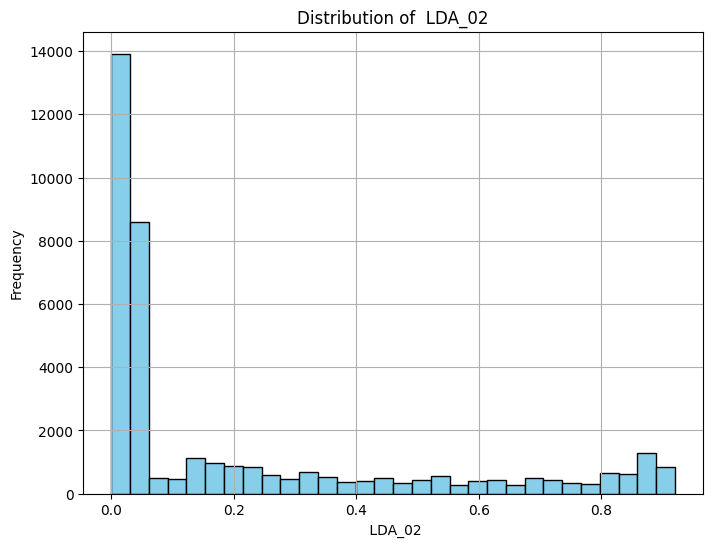

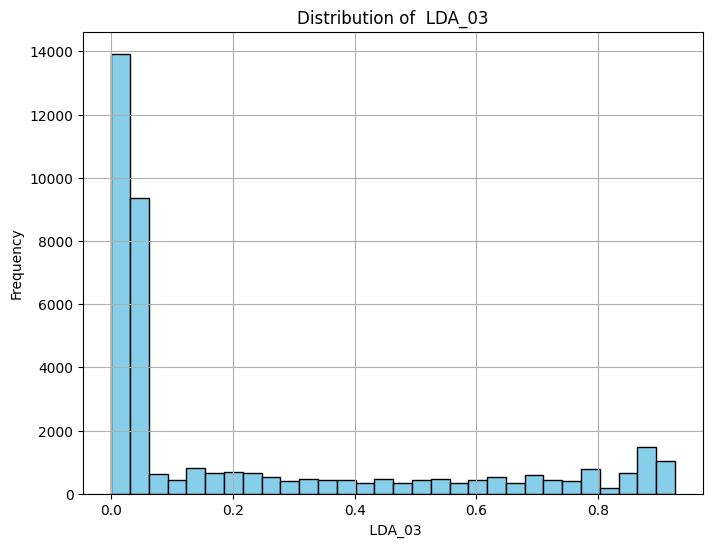

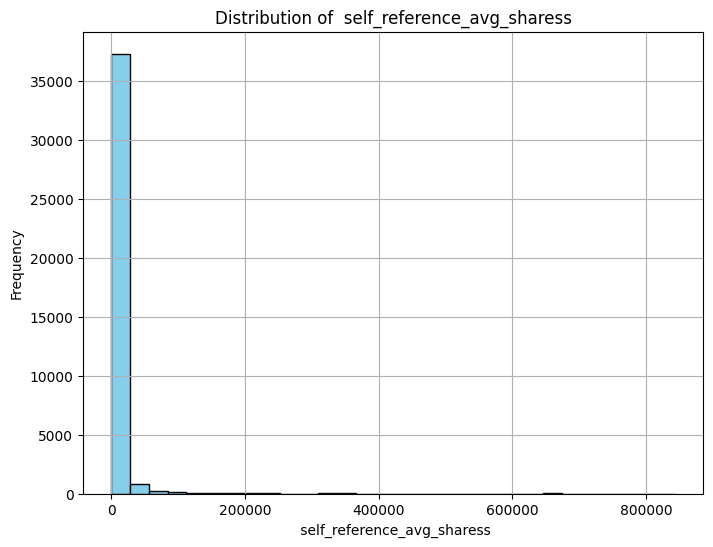

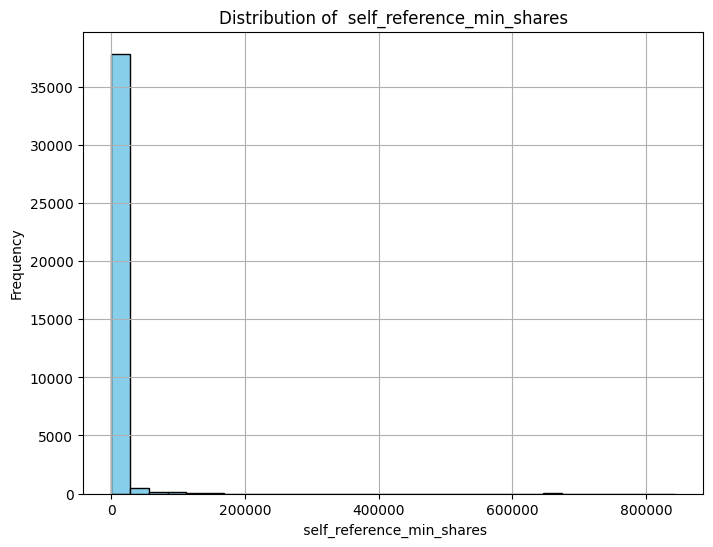

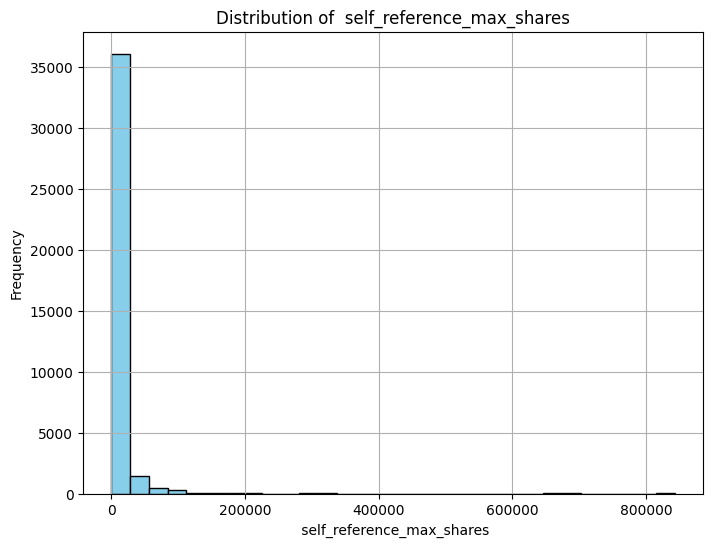

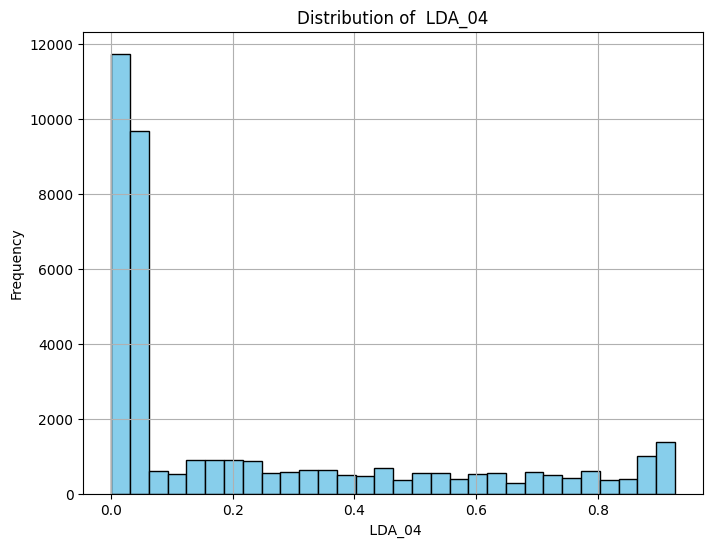

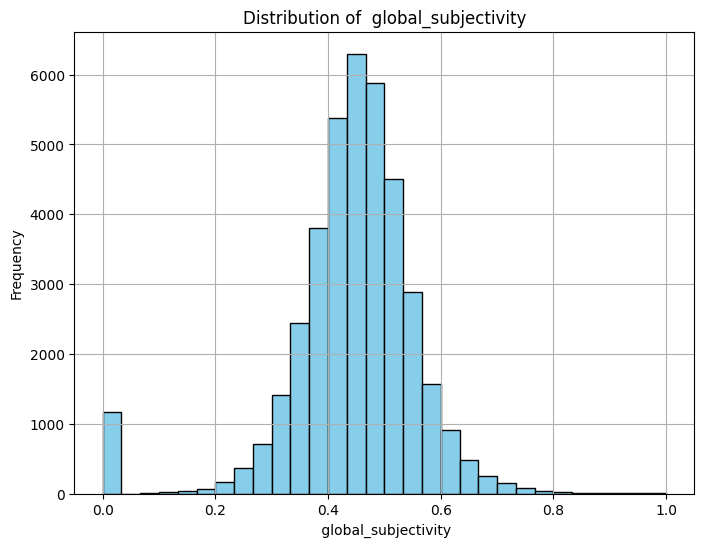

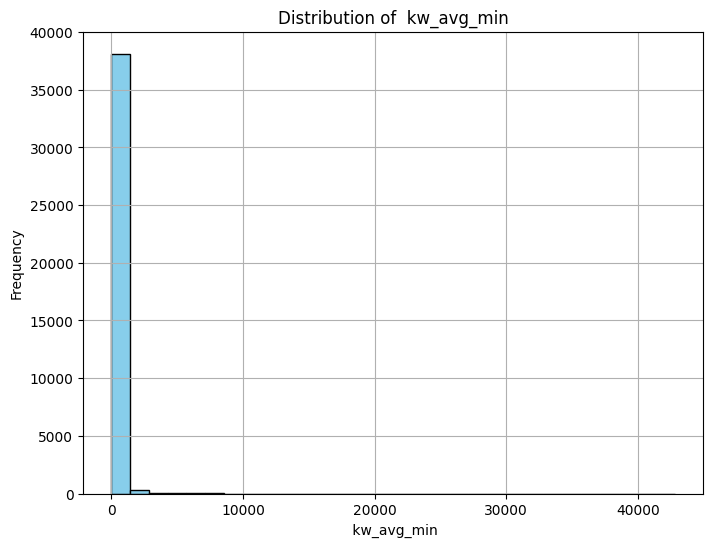

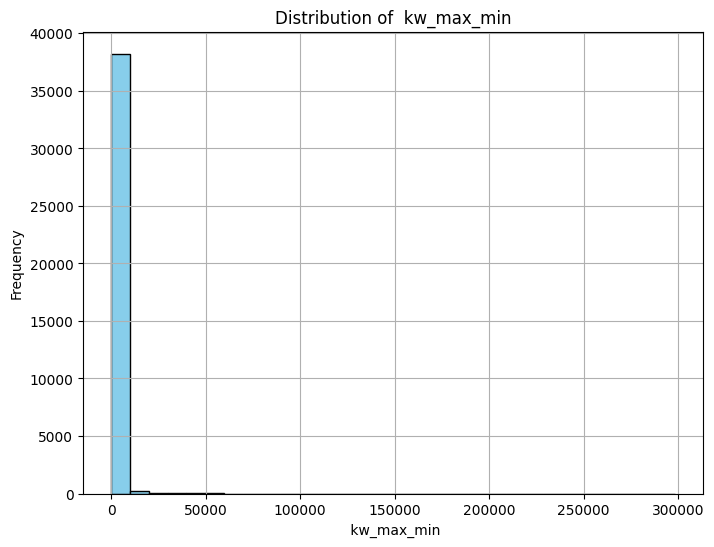

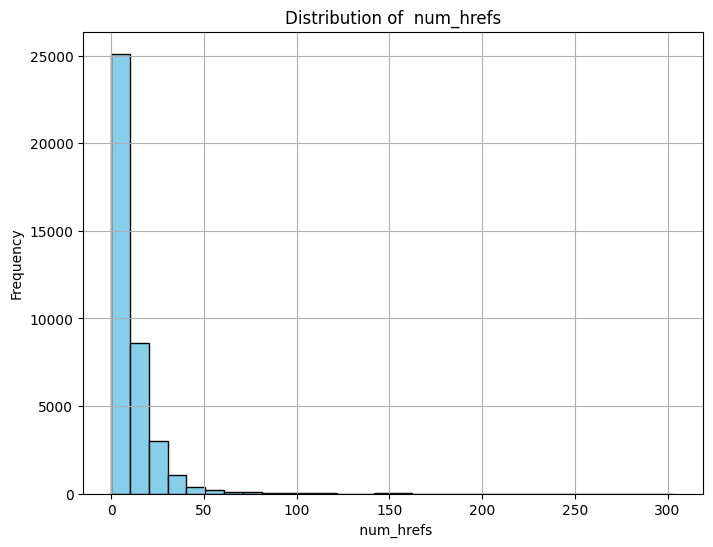

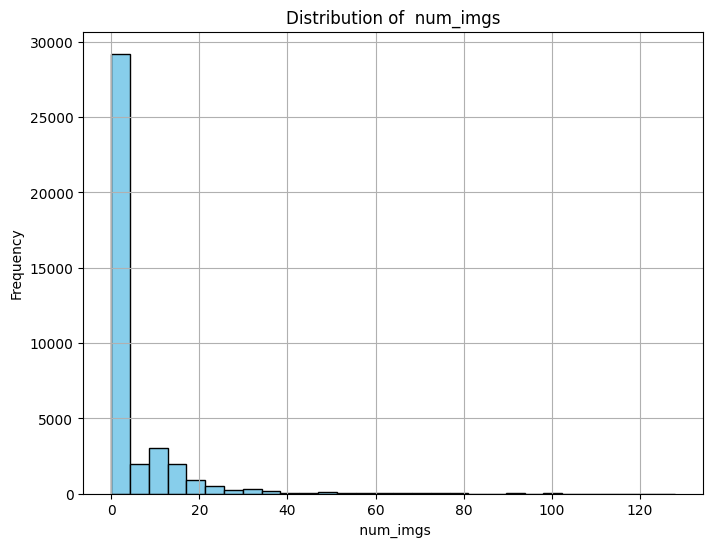

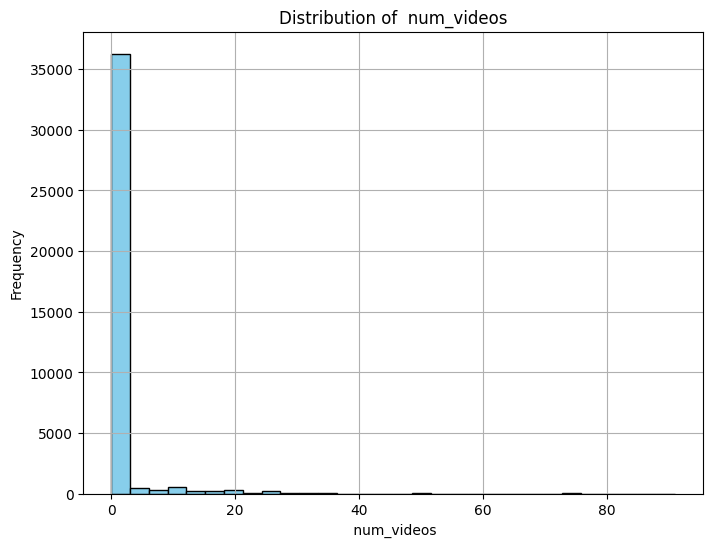

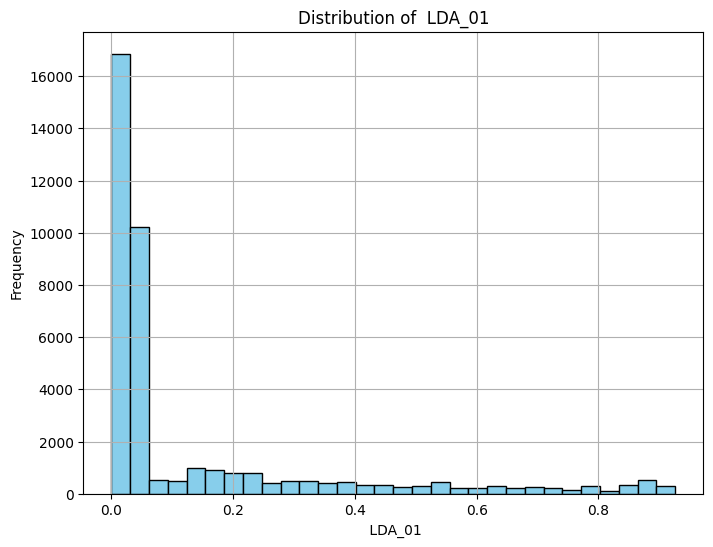

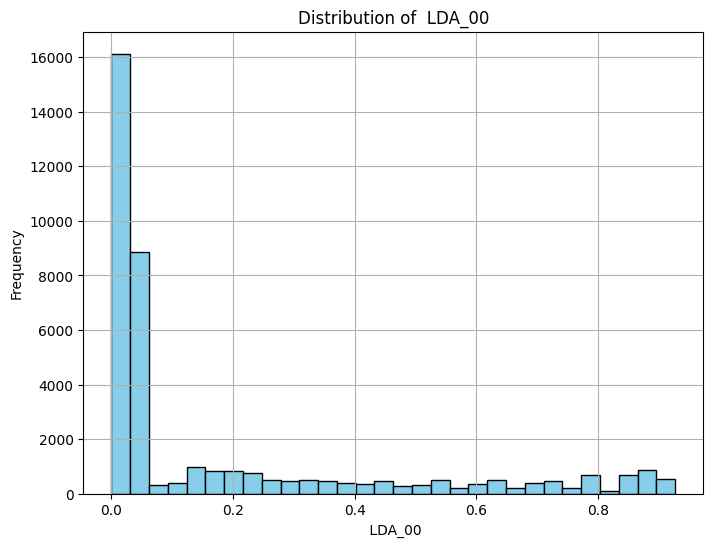

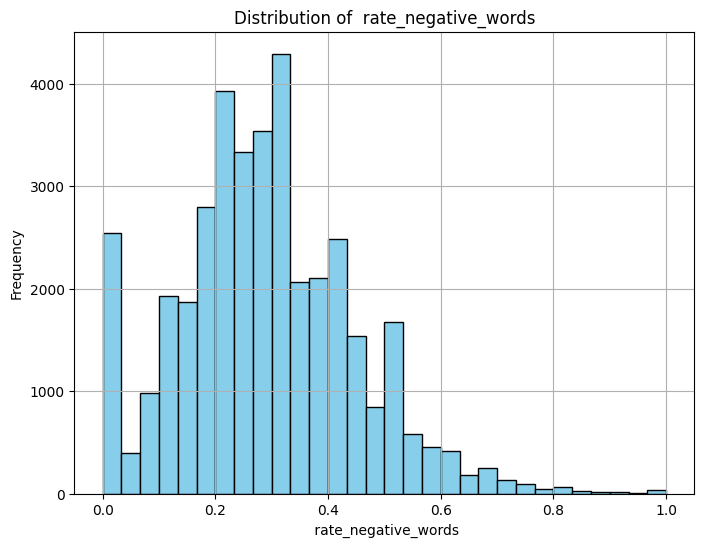

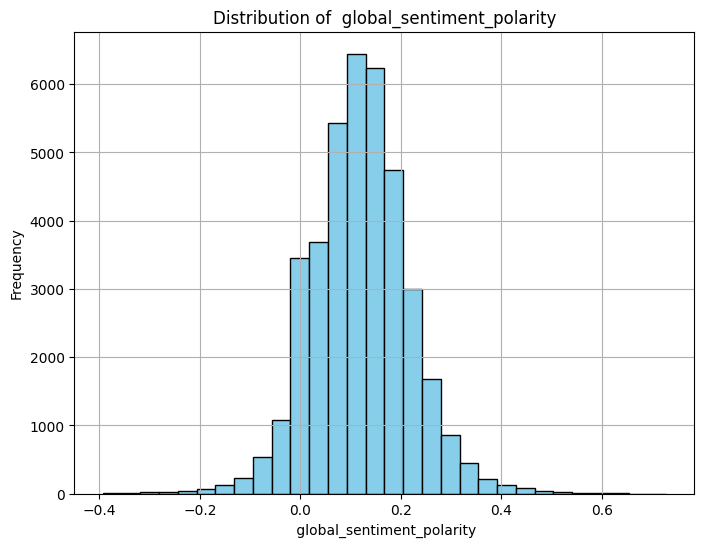

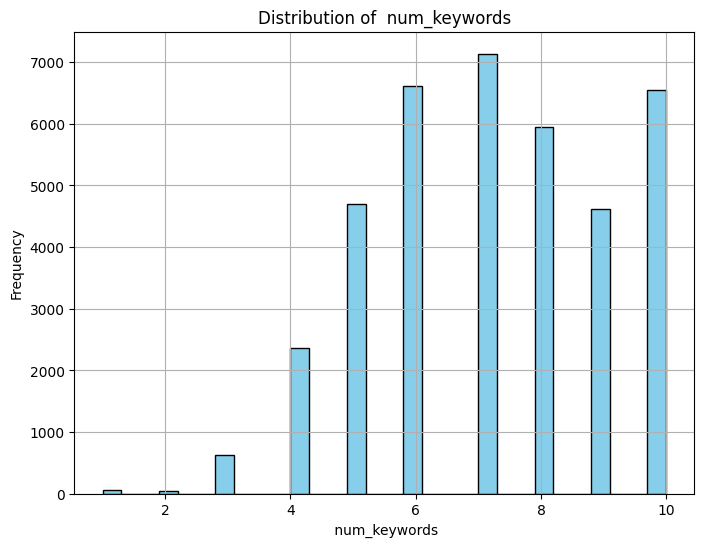

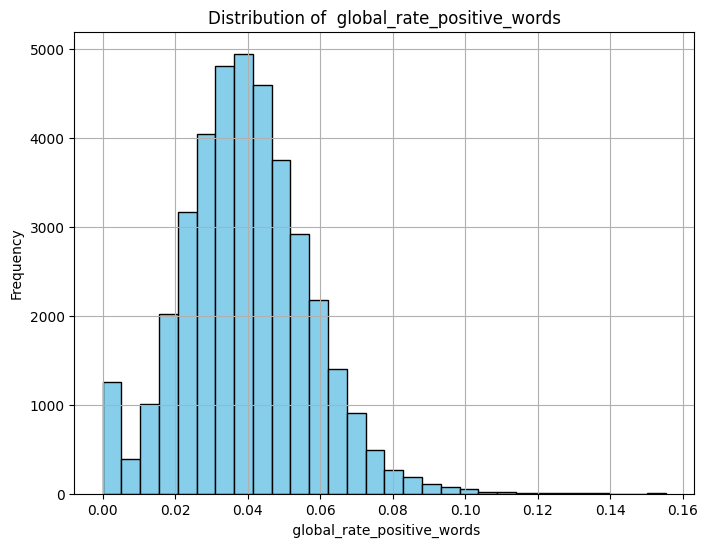

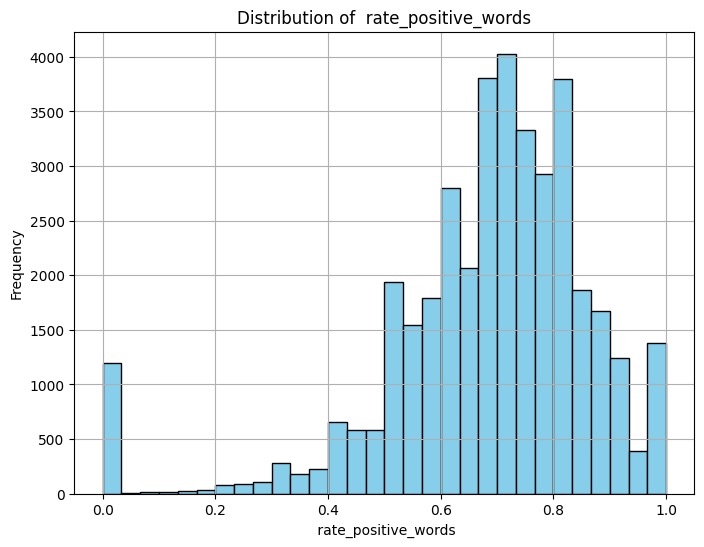

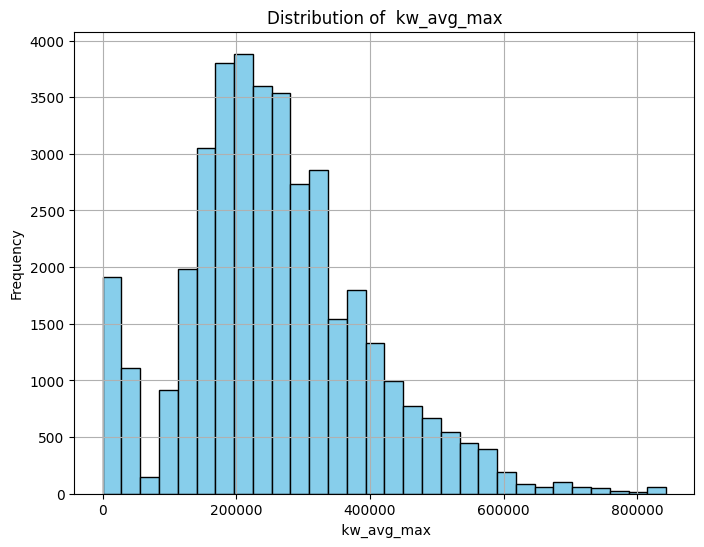

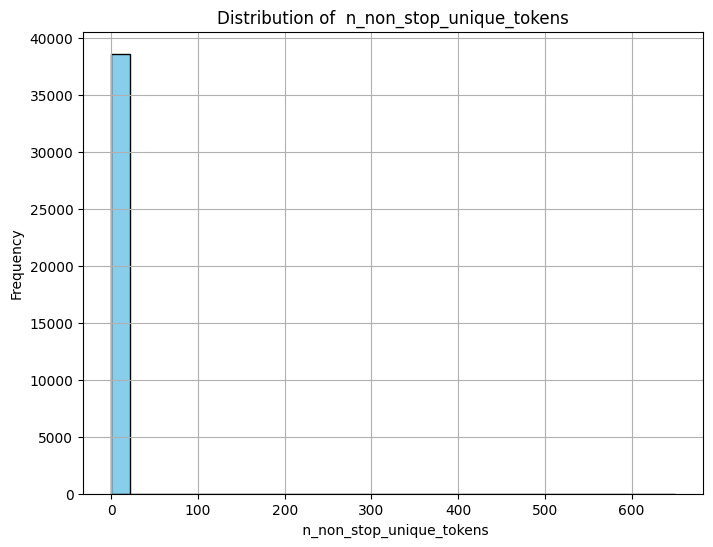

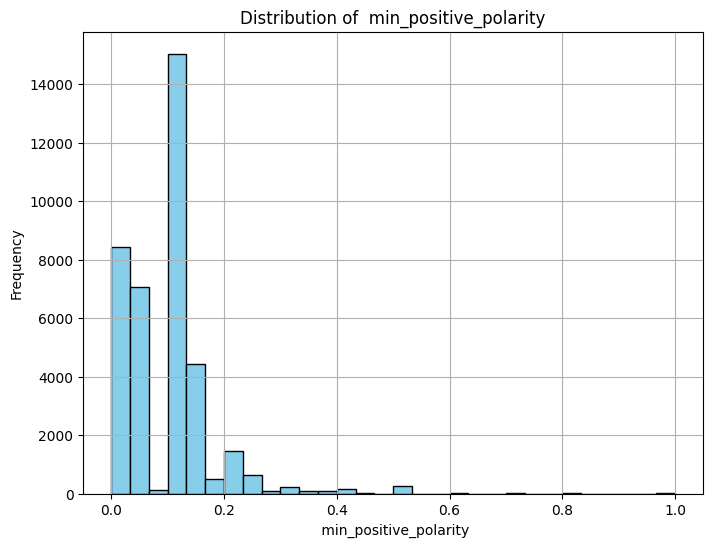

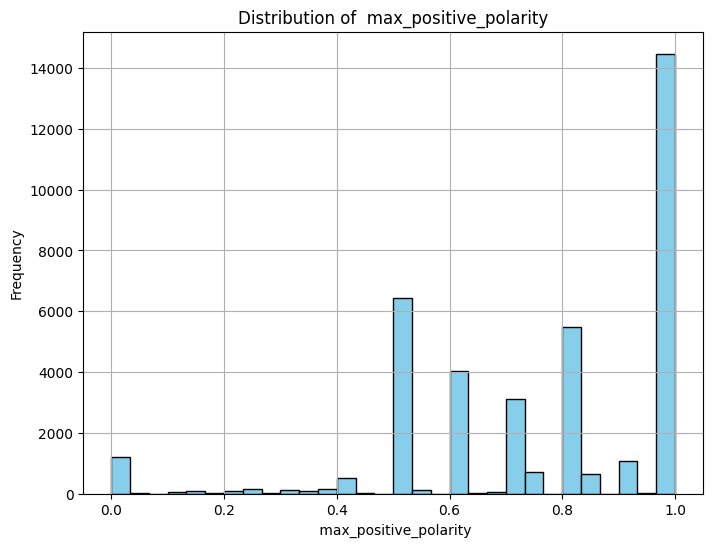

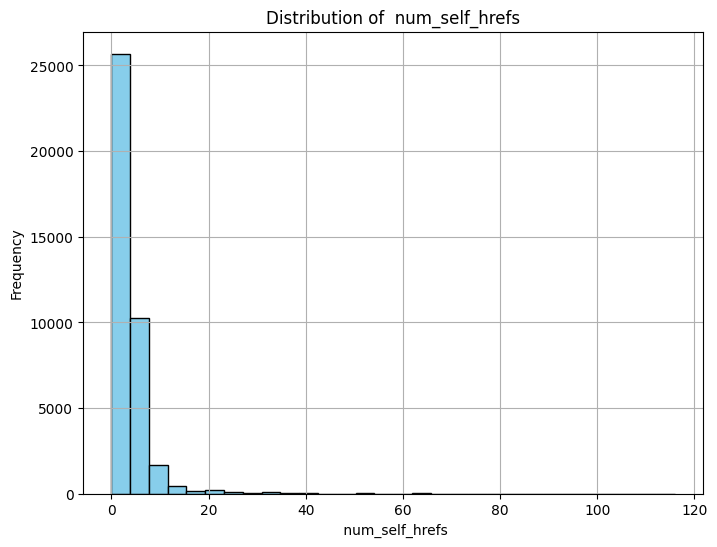

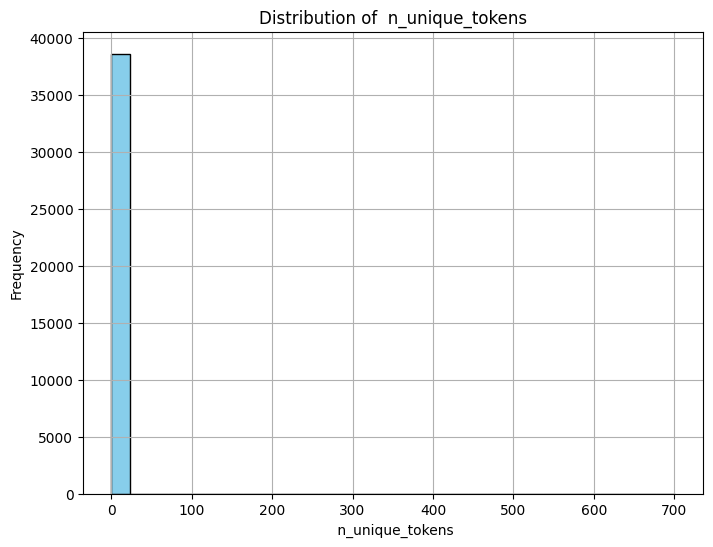

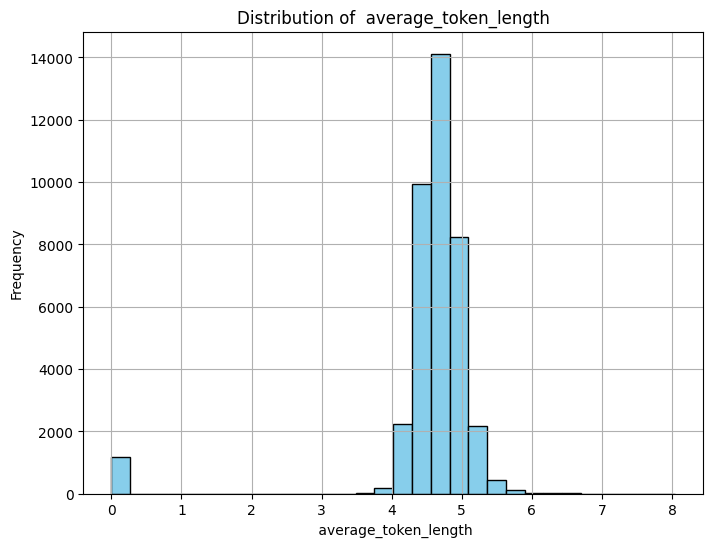

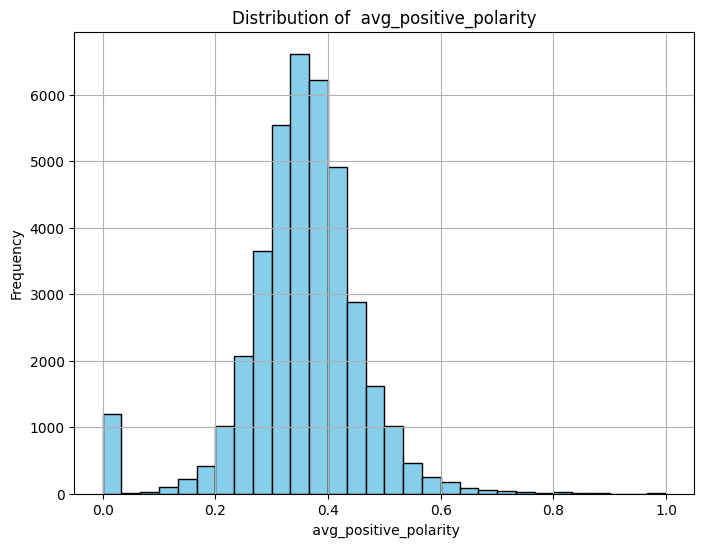

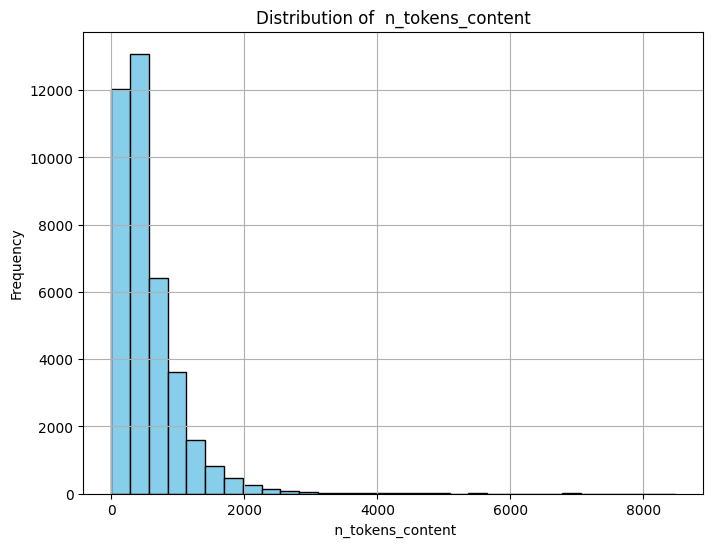

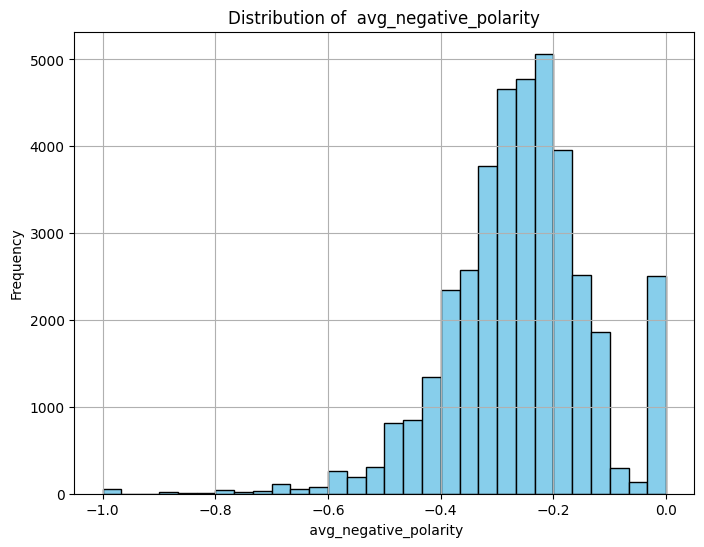

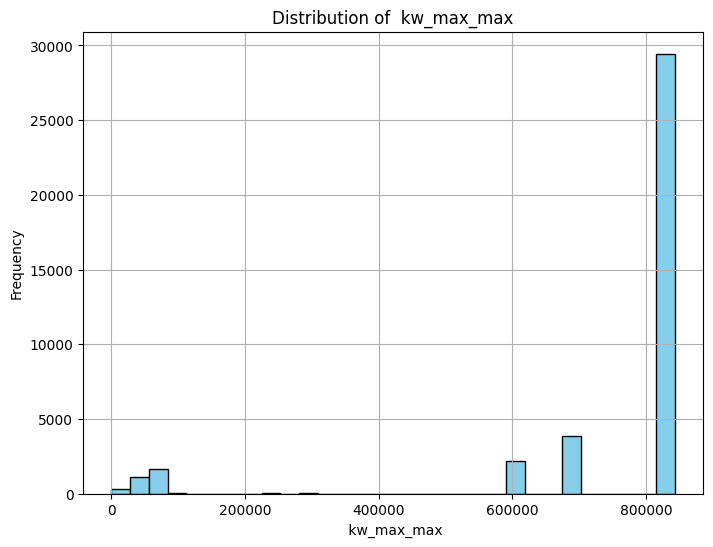

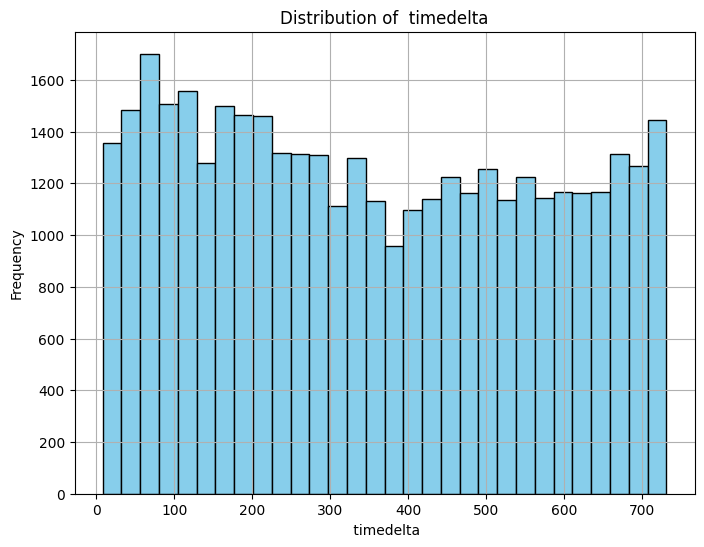

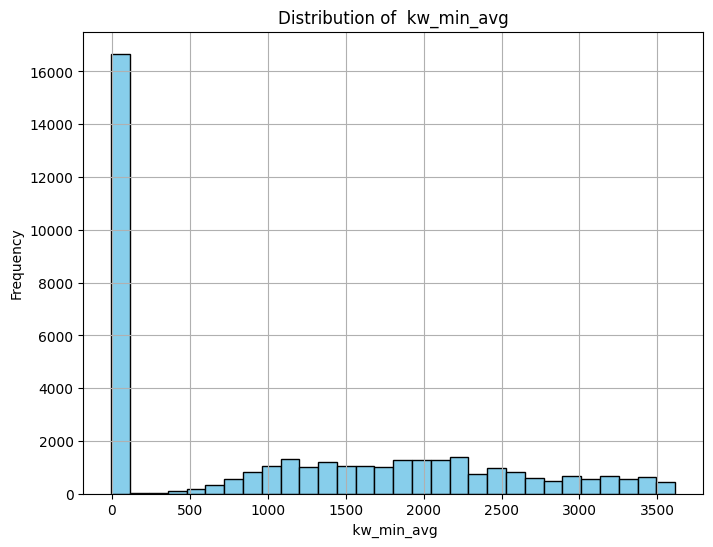

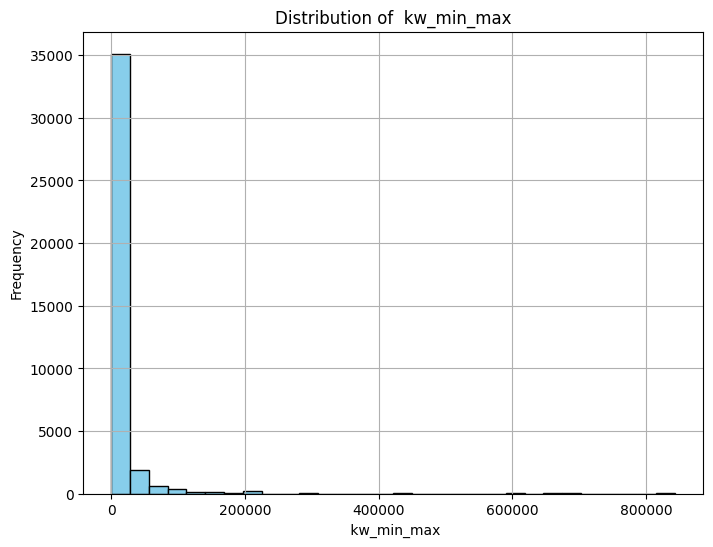

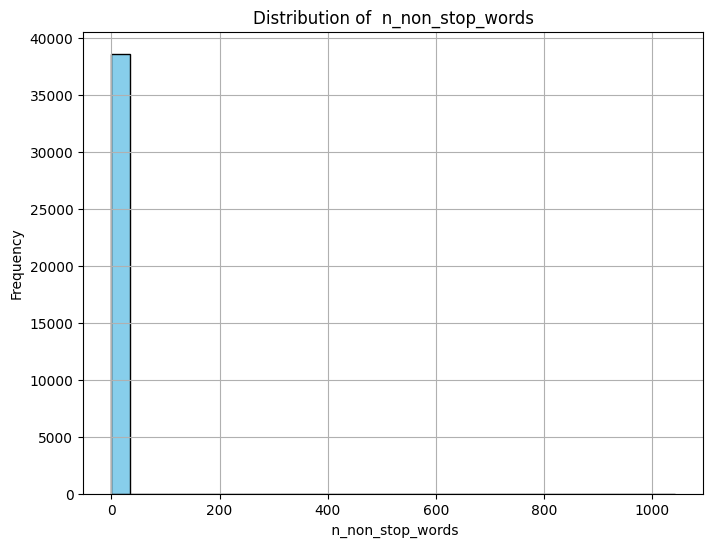

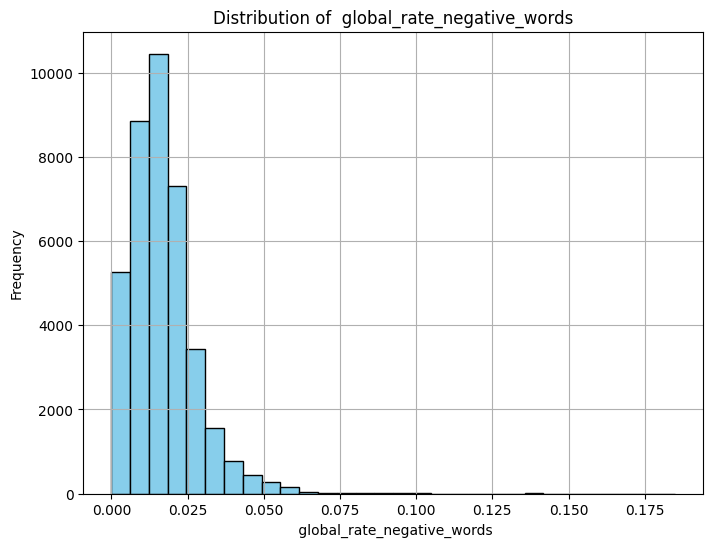

In [ ]:
import matplotlib.pyplot as plt

columns_to_analyze = [' kw_avg_avg', ' kw_max_avg', ' LDA_02', ' LDA_03', ' self_reference_avg_sharess',
                      ' self_reference_min_shares', ' self_reference_max_shares', ' LDA_04', ' global_subjectivity',
                      ' kw_avg_min', ' kw_max_min', ' num_hrefs', ' num_imgs', ' num_videos', ' LDA_01',
                      ' LDA_00', ' rate_negative_words', ' global_sentiment_polarity', ' num_keywords',
                      ' global_rate_positive_words', ' rate_positive_words', ' kw_avg_max', ' n_non_stop_unique_tokens',
                      ' min_positive_polarity', ' max_positive_polarity', ' num_self_hrefs', ' n_unique_tokens',
                      ' average_token_length', ' avg_positive_polarity', ' n_tokens_content', ' avg_negative_polarity',
                      ' kw_max_max', ' timedelta', ' kw_min_avg', ' kw_min_max', ' n_non_stop_words',
                      ' global_rate_negative_words']

numeric_df = df[columns_to_analyze]
skew_values = numeric_df.skew()
print(skew_values)

for column in columns_to_analyze:
    plt.figure(figsize=(8, 6))
    df[column].plot(kind='hist', bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [ ]:
import pandas as pd
import pickle

mean_values = {
    ' rate_negative_words': df[' rate_negative_words'].mean(),
    ' global_sentiment_polarity': df[' global_sentiment_polarity'].mean(),
    ' global_rate_positive_words': df[' global_rate_positive_words'].mean(),
    ' avg_negative_polarity': df[' avg_negative_polarity'].mean(),
    ' timedelta': df[' timedelta'].mean(),
    ' kw_min_avg': df[' kw_min_avg'].mean()
}

mode_values = {
    ' num_keywords': df[' num_keywords'].mode()[0]
}

median_values = {
    ' kw_avg_avg': df[' kw_avg_avg'].median(),
    ' kw_max_avg': df[' kw_max_avg'].median(),
    ' LDA_02': df[' LDA_02'].median(),
    ' LDA_03': df[' LDA_03'].median(),
    ' self_reference_avg_sharess': df[' self_reference_avg_sharess'].median(),
    ' self_reference_min_shares': df[' self_reference_min_shares'].median(),
    ' self_reference_max_shares': df[' self_reference_max_shares'].median(),
    ' LDA_04': df[' LDA_04'].median(),
    ' global_subjectivity': df[' global_subjectivity'].median(),
    ' kw_avg_min': df[' kw_avg_min'].median(),
    ' kw_max_min': df[' kw_max_min'].median(),
    ' num_hrefs': df[' num_hrefs'].median(),
    ' num_imgs': df[' num_imgs'].median(),
    ' num_videos': df[' num_videos'].median(),
    ' LDA_01': df[' LDA_01'].median(),
    ' LDA_00': df[' LDA_00'].median(),
    ' rate_positive_words': df[' rate_positive_words'].median(),
    ' kw_avg_max': df[' kw_avg_max'].median(),
    ' n_non_stop_unique_tokens': df[' n_non_stop_unique_tokens'].median(),
    ' min_positive_polarity': df[' min_positive_polarity'].median(),
    ' max_positive_polarity': df[' max_positive_polarity'].median(),
    ' num_self_hrefs': df[' num_self_hrefs'].median(),
    ' n_unique_tokens': df[' n_unique_tokens'].median(),
    ' average_token_length': df[' average_token_length'].median(),
    ' avg_positive_polarity': df[' avg_positive_polarity'].median(),
    ' n_tokens_content': df[' n_tokens_content'].median(),
    ' kw_max_max': df[' kw_max_max'].median(),
    ' kw_min_max': df[' kw_min_max'].median(),
    ' n_non_stop_words': df[' n_non_stop_words'].median(),
    ' global_rate_negative_words': df[' global_rate_negative_words'].median()
}

with open('imputation_values.pkl', 'wb') as f:
    pickle.dump({'mean': mean_values, 'mode': mode_values, 'median': median_values}, f)

### **Feature Engineering**

Get length of url and title

In [ ]:
df['title'] = df['title'].apply(len)
df['url'] = df['url'].apply(len)

### **Skewness**

In [ ]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
skew_values = numeric_df.skew()
print(skew_values)

url                              1.604696
title                            1.604696
 timedelta                       0.118934
 n_tokens_content                2.946153
 n_unique_tokens               196.141875
 n_non_stop_words              196.272787
 n_non_stop_unique_tokens      195.937404
 num_hrefs                       4.022640
 num_self_hrefs                  5.182942
 num_imgs                        3.967581
 num_videos                      7.014902
 average_token_length           -4.566256
 num_keywords                   -0.150924
 kw_min_min                      2.376361
 kw_max_min                     35.249817
 kw_avg_min                     31.236906
 kw_min_max                     10.399254
 kw_max_max                     -2.648058
 kw_avg_max                      0.625861
 kw_min_avg                      0.467348
 kw_max_avg                     16.576306
 kw_avg_avg                      5.815468
 self_reference_min_shares      26.665187
 self_reference_max_shares      13

In [ ]:
numerical_df = df.select_dtypes(include=['int64','float64'])

categorical_df = df.select_dtypes(exclude=['int64','float64'])

print("Numerical Columns:")
numerical_df.head()

Numerical Columns:


,url,title,timedelta,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity
0,67,35,465,1011,0.469819,1.0,0.671210,20,5,1,...,0.051434,0.025717,0.666667,0.333333,0.334834,0.033333,1.0,-0.295833,-1.0,-0.050
1,78,46,163,161,0.647799,1.0,0.747368,7,5,3,...,0.068323,0.018634,0.785714,0.214286,0.291667,0.033333,0.5,-0.275000,-0.4,-0.125
2,59,27,517,207,0.626214,1.0,0.807018,5,2,0,...,0.033816,0.009662,0.777778,0.222222,0.411395,0.214286,0.5,-0.300000,-0.4,-0.200
3,58,26,394,252,0.581301,1.0,0.729730,5,3,1,...,0.035714,0.000000,1.000000,0.000000,0.313300,0.033333,0.5,0.000000,0.0,0.000
4,61,29,117,463,0.515419,1.0,0.682657,2,2,1,...,0.028078,0.036717,0.433333,0.566667,0.265297,0.062500,0.5,-0.227941,-0.8,-0.100


In [ ]:
print("\nCategorical Columns:")
categorical_df.head()


Categorical Columns:


,channel type,weekday,isWeekEnd,Article Popularity
0,data_channel_is_bus,monday,No,Above Average
1,data_channel_is_socmed,tuesday,No,Average
2,data_channel_is_lifestyle,friday,No,Average
3,data_channel_is_socmed,tuesday,No,Average
4,data_channel_is_world,saturday,Yes,Not Popular


In [ ]:
categorical_df.shape

(38643, 4)

In [ ]:
numerical_df.shape

(38643, 42)

In [ ]:
negcols = numerical_df.columns[(numerical_df<=0).any()]
negcols

Index([' n_tokens_content', ' n_unique_tokens', ' n_non_stop_words',
       ' n_non_stop_unique_tokens', ' num_hrefs', ' num_self_hrefs',
       ' num_imgs', ' num_videos', ' average_token_length', ' kw_min_min',
       ' kw_max_min', ' kw_avg_min', ' kw_min_max', ' kw_max_max',
       ' kw_avg_max', ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg',
       ' self_reference_min_shares', ' self_reference_max_shares',
       ' self_reference_avg_sharess', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_polarity', ' global_rate_positive_words',
       ' global_rate_negative_words', ' rate_positive_words',
       ' rate_negative_words', ' avg_positive_polarity',
       ' min_positive_polarity', ' max_positive_polarity',
       ' avg_negative_polarity', ' min_negative_polarity',
       ' max_negative_polarity'],
      dtype='object')

In [ ]:
import pickle

min_values = {}
for i in negcols:
    min_values[i] = numerical_df[i].min()

with open('min_values_neg_columns.pkl', 'wb') as f:
    pickle.dump(min_values, f)

In [ ]:
for i in negcols:
    min = numerical_df[i].min()
    name = i +'_new'
    numerical_df[name] = ((numerical_df[i]+1)-min)

In [ ]:
numerical_df.head()

,url,title,timedelta,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,global_rate_positive_words_new,global_rate_negative_words_new,rate_positive_words_new,rate_negative_words_new,avg_positive_polarity_new,min_positive_polarity_new,max_positive_polarity_new,avg_negative_polarity_new,min_negative_polarity_new,max_negative_polarity_new
0,67,35,465,1011,0.469819,1.0,0.671210,20,5,1,...,1.051434,1.025717,1.666667,1.333333,1.334834,1.033333,2.0,1.704167,1.0,1.950
1,78,46,163,161,0.647799,1.0,0.747368,7,5,3,...,1.068323,1.018634,1.785714,1.214286,1.291667,1.033333,1.5,1.725000,1.6,1.875
2,59,27,517,207,0.626214,1.0,0.807018,5,2,0,...,1.033816,1.009662,1.777778,1.222222,1.411395,1.214286,1.5,1.700000,1.6,1.800
3,58,26,394,252,0.581301,1.0,0.729730,5,3,1,...,1.035714,1.000000,2.000000,1.000000,1.313300,1.033333,1.5,2.000000,2.0,2.000
4,61,29,117,463,0.515419,1.0,0.682657,2,2,1,...,1.028078,1.036717,1.433333,1.566667,1.265297,1.062500,1.5,1.772059,1.2,1.900


In [ ]:
for i in negcols:
    numerical_df.drop(i,axis=1,inplace=True)

In [ ]:
from sklearn import preprocessing

pt = preprocessing.PowerTransformer(method='box-cox', standardize=False)

numerical_df_transformed = pt.fit_transform(numerical_df)
numerical_df_transformed = pd.DataFrame(numerical_df_transformed, columns=numerical_df.columns)

with open('box_cox.pkl', 'wb') as f:
    pickle.dump(pt, f)

numerical_df_transformed.head()

,url,title,timedelta,num_keywords,n_tokens_content_new,n_unique_tokens_new,n_non_stop_words_new,n_non_stop_unique_tokens_new,num_hrefs_new,num_self_hrefs_new,...,global_rate_positive_words_new,global_rate_negative_words_new,rate_positive_words_new,rate_negative_words_new,avg_positive_polarity_new,min_positive_polarity_new,max_positive_polarity_new,avg_negative_polarity_new,min_negative_polarity_new,max_negative_polarity_new
0,0.863957,4.546259,70.909400,8.250334,34.067830,0.374680,0.703565,0.507645,3.401012,1.745676,...,0.045543,0.017957,1.645209,0.285459,0.427663,0.029098,3.001811,1.135652,0.000000,353.247587
1,0.865073,4.992952,36.267981,10.841348,15.624164,0.481947,0.703565,0.551144,2.241851,1.745676,...,0.058240,0.014287,2.238327,0.193142,0.361599,0.029098,0.904026,1.183766,0.605067,215.669787
2,0.862861,4.136868,75.832052,3.319019,17.448569,0.469662,0.703565,0.583852,1.911498,1.081171,...,0.031185,0.008389,2.194976,0.199587,0.553287,0.102724,0.904026,1.126138,0.605067,129.035125
3,0.862701,4.078500,63.834491,9.537337,19.004727,0.443492,0.703565,0.541249,1.911498,1.358600,...,0.032790,0.000000,3.640851,0.000000,0.394283,0.029098,0.904026,1.906490,1.012911,485.729324
4,0.863164,4.248191,29.233554,4.512841,24.631360,0.403525,0.703565,0.514314,1.142878,1.081171,...,0.026244,0.022342,0.794474,0.443552,0.322900,0.048799,0.904026,1.295808,0.200624,254.777261


In [ ]:
numerical_df_transformed.shape

(38643, 42)

In [ ]:
df=pd.concat([numerical_df_transformed,categorical_df],axis=1)

In [ ]:
df.isnull().sum()

url                                0
title                              0
 timedelta                         0
 num_keywords                      0
 n_tokens_content_new              0
 n_unique_tokens_new               0
 n_non_stop_words_new              0
 n_non_stop_unique_tokens_new      0
 num_hrefs_new                     0
 num_self_hrefs_new                0
 num_imgs_new                      0
 num_videos_new                    0
 average_token_length_new          0
 kw_min_min_new                    0
 kw_max_min_new                    0
 kw_avg_min_new                    0
 kw_min_max_new                    0
 kw_max_max_new                    0
 kw_avg_max_new                    0
 kw_min_avg_new                    0
 kw_max_avg_new                    0
 kw_avg_avg_new                    0
 self_reference_min_shares_new     0
 self_reference_max_shares_new     0
 self_reference_avg_sharess_new    0
 LDA_00_new                        0
 LDA_01_new                        0
 

In [ ]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
skew_values = numeric_df.skew()
print(skew_values)

url                               -0.035284
title                              0.020013
 timedelta                        -0.226436
 num_keywords                     -0.089575
 n_tokens_content_new              0.147609
 n_unique_tokens_new              -0.504120
 n_non_stop_words_new              0.516588
 n_non_stop_unique_tokens_new     -0.257871
 num_hrefs_new                     0.009448
 num_self_hrefs_new               -0.000903
 num_imgs_new                      0.179940
 num_videos_new                    0.673353
 average_token_length_new          0.362276
 kw_min_min_new                    0.547393
 kw_max_min_new                    0.469832
 kw_avg_min_new                    0.427942
 kw_min_max_new                   -0.064647
 kw_max_max_new                   -1.764250
 kw_avg_max_new                   -0.053869
 kw_min_avg_new                   -0.223942
 kw_max_avg_new                    0.767388
 kw_avg_avg_new                    0.612589
 self_reference_min_shares_new  

###**Encoding**

In [ ]:
label_encoder_channel = LabelEncoder()
label_encoder_weekday = LabelEncoder()
label_encoder_article_popularity = LabelEncoder()
label_encoder_isweekend = LabelEncoder()

df['channel type'] = label_encoder_channel.fit_transform(df['channel type'])
df['weekday'] = label_encoder_weekday.fit_transform(df['weekday'])
df['Article Popularity'] = label_encoder_article_popularity.fit_transform(df['Article Popularity'])
df['isWeekEnd'] = label_encoder_isweekend.fit_transform(df['isWeekEnd'])

label_encoders = {
    'channel type': label_encoder_channel,
    'weekday': label_encoder_weekday,
    'Article Popularity': label_encoder_article_popularity,
    'isWeekEnd':label_encoder_isweekend
}

with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)

In [ ]:
df.head()

,url,title,timedelta,num_keywords,n_tokens_content_new,n_unique_tokens_new,n_non_stop_words_new,n_non_stop_unique_tokens_new,num_hrefs_new,num_self_hrefs_new,...,avg_positive_polarity_new,min_positive_polarity_new,max_positive_polarity_new,avg_negative_polarity_new,min_negative_polarity_new,max_negative_polarity_new,channel type,weekday,isWeekEnd,Article Popularity
0,0.863957,4.546259,70.909400,8.250334,34.067830,0.374680,0.703565,0.507645,3.401012,1.745676,...,0.427663,0.029098,3.001811,1.135652,0.000000,353.247587,0,1,0,0
1,0.865073,4.992952,36.267981,10.841348,15.624164,0.481947,0.703565,0.551144,2.241851,1.745676,...,0.361599,0.029098,0.904026,1.183766,0.605067,215.669787,3,5,0,1
2,0.862861,4.136868,75.832052,3.319019,17.448569,0.469662,0.703565,0.583852,1.911498,1.081171,...,0.553287,0.102724,0.904026,1.126138,0.605067,129.035125,2,0,0,1
3,0.862701,4.078500,63.834491,9.537337,19.004727,0.443492,0.703565,0.541249,1.911498,1.358600,...,0.394283,0.029098,0.904026,1.906490,1.012911,485.729324,3,5,0,1
4,0.863164,4.248191,29.233554,4.512841,24.631360,0.403525,0.703565,0.514314,1.142878,1.081171,...,0.322900,0.048799,0.904026,1.295808,0.200624,254.777261,5,2,1,2


### **Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import pickle

df_features = df.drop(['Article Popularity', 'channel type', 'weekday', 'isWeekEnd'], axis=1)

scaler = MinMaxScaler()

df_scaled_features = scaler.fit_transform(df_features)

df_scaled_features = pd.DataFrame(df_scaled_features, columns=df_features.columns)

df_scaled = pd.concat([df_scaled_features, df[['Article Popularity', 'channel type', 'weekday', 'isWeekEnd']]], axis=1)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

df = df_scaled

df.head()

,url,title,timedelta,num_keywords,n_tokens_content_new,n_unique_tokens_new,n_non_stop_words_new,n_non_stop_unique_tokens_new,num_hrefs_new,num_self_hrefs_new,...,avg_positive_polarity_new,min_positive_polarity_new,max_positive_polarity_new,avg_negative_polarity_new,min_negative_polarity_new,max_negative_polarity_new,Article Popularity,channel type,weekday,isWeekEnd
0,0.626975,0.585595,0.739718,0.761006,0.426503,0.088238,0.08688,0.090364,0.481310,0.392659,...,0.223424,0.217678,1.00000,0.595677,0.000000,0.727252,0,0,1,0
1,0.712147,0.654069,0.355363,1.000000,0.195603,0.113499,0.08688,0.098107,0.317266,0.392659,...,0.188911,0.217678,0.30116,0.620914,0.597354,0.444012,1,3,5,0
2,0.543379,0.522839,0.794336,0.306145,0.218443,0.110606,0.08688,0.103929,0.270514,0.243191,...,0.289054,0.768474,0.30116,0.590687,0.597354,0.265652,1,2,0,0
3,0.531182,0.513891,0.661220,0.879719,0.237925,0.104443,0.08688,0.096346,0.270514,0.305593,...,0.205986,0.217678,0.30116,1.000000,1.000000,1.000000,1,3,5,0
4,0.566489,0.539904,0.277315,0.416262,0.308366,0.095031,0.08688,0.091551,0.161740,0.243191,...,0.168693,0.365061,0.30116,0.679683,0.198067,0.524525,2,5,2,1


## **Feature Selection**

### **Pearson's Correlation**

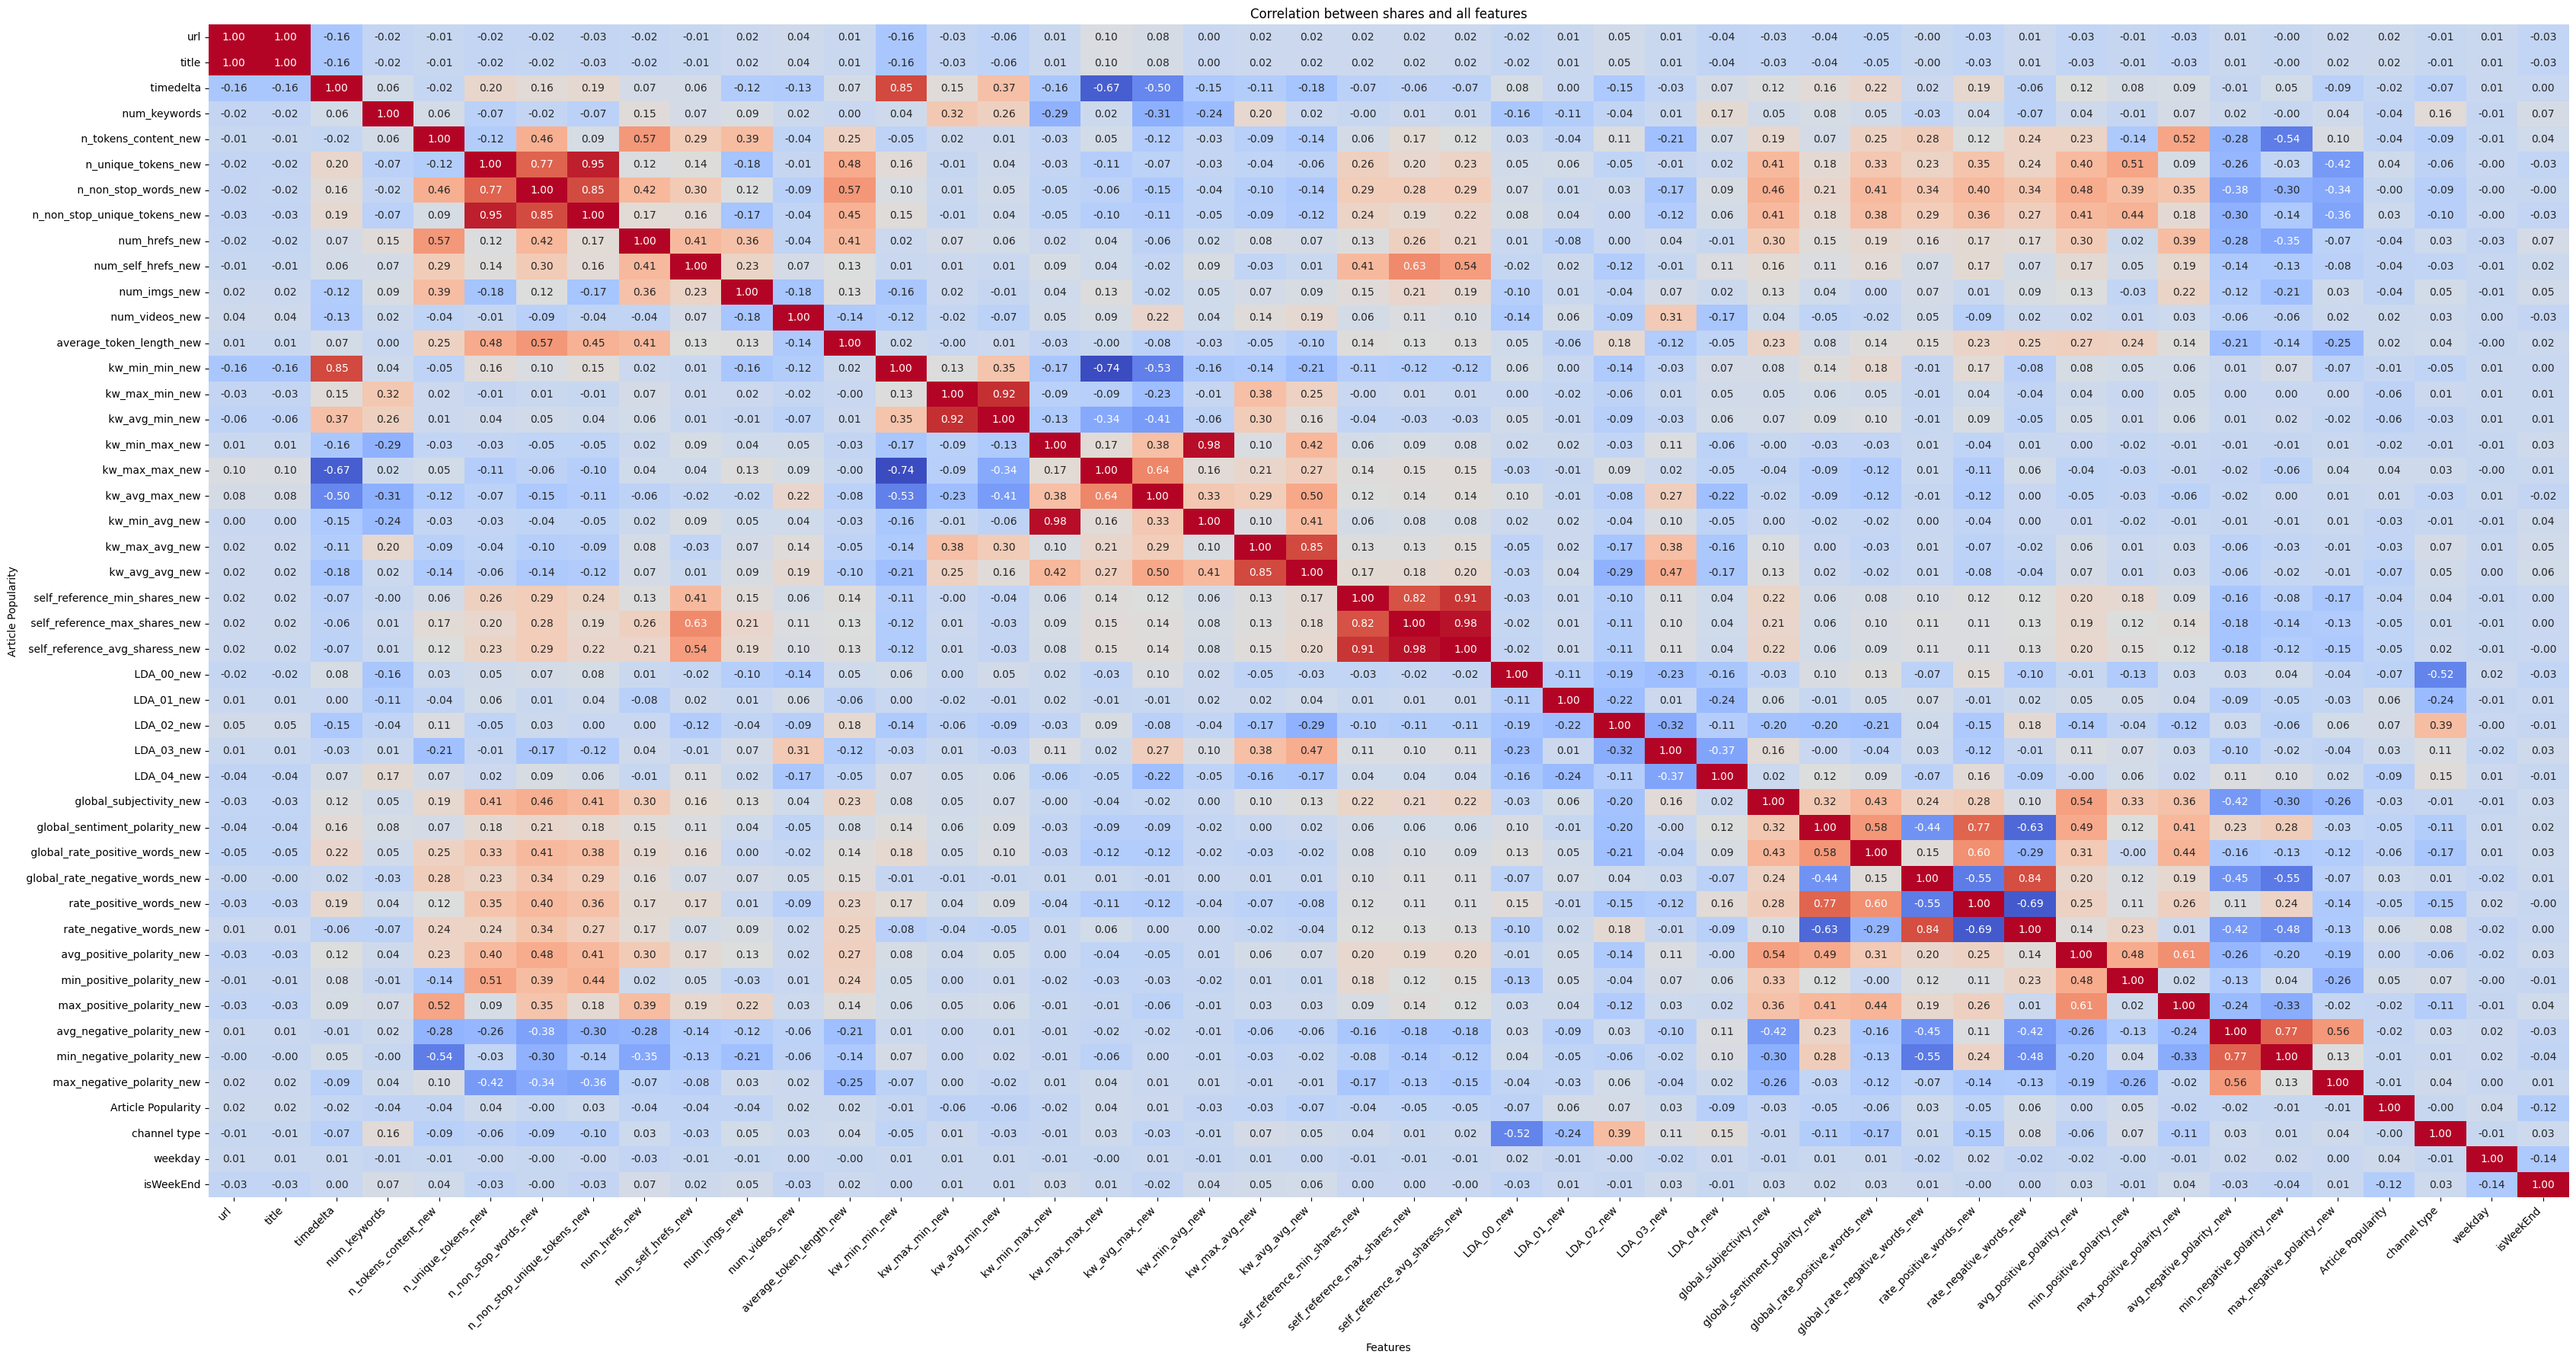

In [ ]:
plt.figure(figsize=(40, 20))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt=".2f", cbar=False)
plt.title("Correlation between shares and all features")
plt.xlabel("Features")
plt.ylabel("Article Popularity")
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
numeric_df_filtered = df.select_dtypes(include=['float64', 'int','bool'])
corr_with_shares = numeric_df_filtered.corr()['Article Popularity'].sort_values(ascending=False)
print("Correlation with 'Article Popularity':")
print(corr_with_shares)

Correlation with 'Article Popularity':
Article Popularity                 1.000000
 LDA_02_new                        0.070845
 LDA_01_new                        0.062634
 rate_negative_words_new           0.057765
 min_positive_polarity_new         0.047493
weekday                            0.038266
 kw_max_max_new                    0.037352
 n_unique_tokens_new               0.036534
 LDA_03_new                        0.033772
 global_rate_negative_words_new    0.027005
 n_non_stop_unique_tokens_new      0.026056
 average_token_length_new          0.023669
 num_videos_new                    0.020713
url                                0.020660
title                              0.020076
 kw_avg_max_new                    0.013182
 avg_positive_polarity_new         0.002789
 n_non_stop_words_new             -0.002250
channel type                      -0.003820
 min_negative_polarity_new        -0.006234
 max_negative_polarity_new        -0.007650
 kw_min_min_new                   -0.

In [ ]:
df.head()

,url,title,timedelta,num_keywords,n_tokens_content_new,n_unique_tokens_new,n_non_stop_words_new,n_non_stop_unique_tokens_new,num_hrefs_new,num_self_hrefs_new,...,avg_positive_polarity_new,min_positive_polarity_new,max_positive_polarity_new,avg_negative_polarity_new,min_negative_polarity_new,max_negative_polarity_new,Article Popularity,channel type,weekday,isWeekEnd
0,0.626975,0.585595,0.739718,0.761006,0.426503,0.088238,0.08688,0.090364,0.481310,0.392659,...,0.223424,0.217678,1.00000,0.595677,0.000000,0.727252,0,0,1,0
1,0.712147,0.654069,0.355363,1.000000,0.195603,0.113499,0.08688,0.098107,0.317266,0.392659,...,0.188911,0.217678,0.30116,0.620914,0.597354,0.444012,1,3,5,0
2,0.543379,0.522839,0.794336,0.306145,0.218443,0.110606,0.08688,0.103929,0.270514,0.243191,...,0.289054,0.768474,0.30116,0.590687,0.597354,0.265652,1,2,0,0
3,0.531182,0.513891,0.661220,0.879719,0.237925,0.104443,0.08688,0.096346,0.270514,0.305593,...,0.205986,0.217678,0.30116,1.000000,1.000000,1.000000,1,3,5,0
4,0.566489,0.539904,0.277315,0.416262,0.308366,0.095031,0.08688,0.091551,0.161740,0.243191,...,0.168693,0.365061,0.30116,0.679683,0.198067,0.524525,2,5,2,1


###**ANOVA**

In [ ]:
df=df.dropna()

In [ ]:
from sklearn.feature_selection import f_classif
import pickle

X = df.drop('Article Popularity', axis=1)
y = df['Article Popularity']

f_scores, p_values = f_classif(X, y)

anova_results = pd.DataFrame({'Feature': X.columns, 'F-Score': f_scores, 'p-value': p_values})

anova_results_sorted = anova_results.sort_values(by='F-Score', ascending=False)

top_40_features = anova_results_sorted.head(40)['Feature'].tolist()
print(top_40_features)

with open('selected_features.pkl', 'wb') as f:
    pickle.dump(top_40_features, f)

X = df[top_40_features]

[' kw_avg_avg_new', ' kw_max_avg_new', 'isWeekEnd', ' LDA_02_new', ' LDA_03_new', ' self_reference_avg_sharess_new', ' self_reference_min_shares_new', ' self_reference_max_shares_new', ' LDA_04_new', ' global_subjectivity_new', ' kw_avg_min_new', ' kw_max_min_new', ' num_hrefs_new', ' num_imgs_new', ' num_videos_new', ' LDA_01_new', ' LDA_00_new', ' rate_negative_words_new', ' global_sentiment_polarity_new', ' num_keywords', ' global_rate_positive_words_new', 'weekday', ' rate_positive_words_new', ' kw_avg_max_new', ' n_non_stop_unique_tokens_new', 'channel type', ' min_positive_polarity_new', ' max_positive_polarity_new', ' num_self_hrefs_new', ' n_unique_tokens_new', ' average_token_length_new', ' avg_positive_polarity_new', ' n_tokens_content_new', ' avg_negative_polarity_new', ' kw_max_max_new', ' timedelta', ' kw_min_avg_new', ' kw_min_max_new', ' n_non_stop_words_new', ' global_rate_negative_words_new']


In [ ]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
skew_values = numeric_df.skew()
print(skew_values)

url                               -0.035284
title                              0.020013
 timedelta                        -0.226436
 num_keywords                     -0.089575
 n_tokens_content_new              0.147609
 n_unique_tokens_new              -0.504120
 n_non_stop_words_new              0.516588
 n_non_stop_unique_tokens_new     -0.257871
 num_hrefs_new                     0.009448
 num_self_hrefs_new               -0.000903
 num_imgs_new                      0.179940
 num_videos_new                    0.673353
 average_token_length_new          0.362276
 kw_min_min_new                    0.547393
 kw_max_min_new                    0.469832
 kw_avg_min_new                    0.427942
 kw_min_max_new                   -0.064647
 kw_max_max_new                   -1.764250
 kw_avg_max_new                   -0.053869
 kw_min_avg_new                   -0.223942
 kw_max_avg_new                    0.767388
 kw_avg_avg_new                    0.612589
 self_reference_min_shares_new  

## **Modelling**

### **Logistic Regression**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import time
import pickle

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

penalty = 'l2'
C = 0.001

model_Log = LogisticRegression(penalty=penalty, C=C)

start_train_time = time.time()
model_Log.fit(X_train, y_train)
end_train_time = time.time()

with open('logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(model_Log, f)

start_test_time = time.time()
y_test_pred = model_Log.predict(X_test)
end_test_time = time.time()

total_train_time = end_train_time - start_train_time
total_test_time = end_test_time - start_test_time

train_accuracy = accuracy_score(y_train, model_Log.predict(X_train)) * 100
test_accuracy = accuracy_score(y_test, y_test_pred) * 100

print("Logistic Regression Training Accuracy:", train_accuracy, '%')
print("Logistic Regression Testing Accuracy:", test_accuracy, '%')
print("Logistic Regression total Training Time:", total_train_time, "seconds")
print("Logistic Regression total Testing Time:", total_test_time, "seconds")

Logistic Regression Training Accuracy: 44.07064760302776 %
Logistic Regression Testing Accuracy: 44.22305602277138 %
Logistic Regression total Training Time: 2.540346384048462 seconds
Logistic Regression total Testing Time: 0.016305923461914062 seconds


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import time
import pickle

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

penalty = 'l2'
C = 1.0

model_Log = LogisticRegression(penalty=penalty, C=C)

start_train_time = time.time()
model_Log.fit(X_train, y_train)
end_train_time = time.time()

with open('logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(model_Log, f)

start_test_time = time.time()
y_test_pred = model_Log.predict(X_test)
end_test_time = time.time()

total_train_time = end_train_time - start_train_time
total_test_time = end_test_time - start_test_time

train_accuracy = accuracy_score(y_train, model_Log.predict(X_train)) * 100
test_accuracy = accuracy_score(y_test, y_test_pred) * 100

print("Logistic Regression Training Accuracy:", train_accuracy, '%')
print("Logistic Regression Testing Accuracy:", test_accuracy, '%')
print("Logistic Regression total Training Time:", total_train_time, "seconds")
print("Logistic Regression total Testing Time:", total_test_time, "seconds")

Logistic Regression Training Accuracy: 46.127967910978846 %
Logistic Regression Testing Accuracy: 45.81446500194074 %
Logistic Regression total Training Time: 1.8517134189605713 seconds
Logistic Regression total Testing Time: 0.005758047103881836 seconds


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import time
import pickle

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

penalty = 'l2'
C = 100.0

model_Log = LogisticRegression(penalty=penalty, C=C)

start_train_time = time.time()
model_Log.fit(X_train, y_train)
end_train_time = time.time()

with open('logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(model_Log, f)

start_test_time = time.time()
y_test_pred = model_Log.predict(X_test)
end_test_time = time.time()

total_train_time = end_train_time - start_train_time
total_test_time = end_test_time - start_test_time

train_accuracy = accuracy_score(y_train, model_Log.predict(X_train)) * 100
test_accuracy = accuracy_score(y_test, y_test_pred) * 100

print("Logistic Regression Training Accuracy:", train_accuracy, '%')
print("Logistic Regression Testing Accuracy:", test_accuracy, '%')
print("Logistic Regression total Training Time:", total_train_time, "seconds")
print("Logistic Regression total Testing Time:", total_test_time, "seconds")

Logistic Regression Training Accuracy: 46.1409070324125 %
Logistic Regression Testing Accuracy: 45.67214387372234 %
Logistic Regression total Training Time: 1.3111891746520996 seconds
Logistic Regression total Testing Time: 0.006078243255615234 seconds


### **XG Boost**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import time

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

model_XGB = XGBClassifier(learning_rate = 0.1, max_depth = 4, n_estimators = 120, subsample = 0.4, colsample_bytree = 0.6)

start_train_time = time.time()
model_XGB.fit(X_train, y_train)
end_train_time = time.time()

with open('xgBoost_model.pkl', 'wb') as f:
    pickle.dump(model_XGB, f)

start_test_time = time.time()
y_test_pred = model_XGB.predict(X_test)
end_test_time = time.time()

total_train_time = end_train_time - start_train_time
total_test_time = end_test_time - start_test_time

train_accuracy = accuracy_score(y_train, model_XGB.predict(X_train)) * 100
test_accuracy = accuracy_score(y_test, y_test_pred) * 100

print("XG Boost Training Accuracy:", train_accuracy, '%')
print("XG Boost Testing Accuracy:", test_accuracy, '%')
print("XG Boost total Training Time:", total_train_time, "seconds")
print("XG Boost total Testing Time:", total_test_time, "seconds")

XG Boost Training Accuracy: 53.95613637833991 %
XG Boost Testing Accuracy: 49.47599948246862 %
XG Boost total Training Time: 3.305225372314453 seconds
XG Boost total Testing Time: 0.07399320602416992 seconds


### **SVM POLY**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import time

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_SVC = SVC(kernel='poly', C=0.1)


start_train_time = time.time()
model_SVC.fit(X_train, y_train)
end_train_time = time.time()

with open('poly_svm_model.pkl', 'wb') as f:
    pickle.dump(model_SVC, f)

start_test_time = time.time()
y_test_pred = model_SVC.predict(X_test)
end_test_time = time.time()

total_train_time = end_train_time - start_train_time
total_test_time = end_test_time - start_test_time

train_accuracy = accuracy_score(y_train, model_SVC.predict(X_train)) * 100
test_accuracy = accuracy_score(y_test, y_test_pred) * 100

print("Polynomial SVM Training Accuracy:", train_accuracy, '%')
print("Polynomial SVM Testing Accuracy:", test_accuracy, '%')
print("Polynomial SVM total Training Time:", total_train_time, "seconds")
print("Polynomial SVM total Testing Time:", total_test_time, "seconds")

Polynomial SVM Training Accuracy: 44.662612408617456 %
Polynomial SVM Testing Accuracy: 44.80527882002846 %
Polynomial SVM total Training Time: 121.76342129707336 seconds
Polynomial SVM total Testing Time: 13.028457164764404 seconds


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import time

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_SVC = SVC(kernel='poly', C=20)

start_train_time = time.time()
model_SVC.fit(X_train, y_train)
end_train_time = time.time()

with open('poly_svm_model.pkl', 'wb') as f:
    pickle.dump(model_SVC, f)

start_test_time = time.time()
y_test_pred = model_SVC.predict(X_test)
end_test_time = time.time()

total_train_time = end_train_time - start_train_time
total_test_time = end_test_time - start_test_time

train_accuracy = accuracy_score(y_train, model_SVC.predict(X_train)) * 100
test_accuracy = accuracy_score(y_test, y_test_pred) * 100

print("Polynomial SVM Training Accuracy:", train_accuracy, '%')
print("Polynomial SVM Testing Accuracy:", test_accuracy, '%')
print("Polynomial SVM total Training Time:", total_train_time, "seconds")
print("Polynomial SVM total Testing Time:", total_test_time, "seconds")

Polynomial SVM Training Accuracy: 47.9168014491816 %
Polynomial SVM Testing Accuracy: 46.784836330702554 %
Polynomial SVM total Training Time: 355.1182475090027 seconds
Polynomial SVM total Testing Time: 12.24128007888794 seconds


### **SVM RBF**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import time

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_rbf = SVC(kernel='rbf', C=0.001)

start_train_time = time.time()
model_rbf.fit(X_train, y_train)
end_train_time = time.time()

with open('rbf_svm_model.pkl', 'wb') as f:
    pickle.dump(model_rbf, f)

start_test_time = time.time()
y_test_pred = model_rbf.predict(X_test)
end_test_time = time.time()

total_train_time = end_train_time - start_train_time
total_test_time = end_test_time - start_test_time

train_accuracy = accuracy_score(y_train, model_rbf.predict(X_train)) * 100
test_accuracy = accuracy_score(y_test, y_test_pred) * 100

print("RBF SVM Training Accuracy:", train_accuracy, '%')
print("RBF SVM Testing Accuracy:", test_accuracy, '%')
print("RBF SVM total Training Time:", total_train_time, "seconds")
print("RBF SVM total Testing Time:", total_test_time, "seconds")

RBF SVM Training Accuracy: 43.12609173837097 %
RBF SVM Testing Accuracy: 43.200931556475616 %
RBF SVM total Training Time: 122.37076425552368 seconds
RBF SVM total Testing Time: 22.323692083358765 seconds


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import time

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_rbf = SVC(kernel='rbf', C=20)

start_train_time = time.time()
model_rbf.fit(X_train, y_train)
end_train_time = time.time()

with open('rbf_svm_model.pkl', 'wb') as f:
    pickle.dump(model_rbf, f)

start_test_time = time.time()
y_test_pred = model_rbf.predict(X_test)
end_test_time = time.time()

total_train_time = end_train_time - start_train_time
total_test_time = end_test_time - start_test_time

train_accuracy = accuracy_score(y_train, model_rbf.predict(X_train)) * 100
test_accuracy = accuracy_score(y_test, y_test_pred) * 100

print("RBF SVM Training Accuracy:", train_accuracy, '%')
print("RBF SVM Testing Accuracy:", test_accuracy, '%')
print("RBF SVM total Training Time:", total_train_time, "seconds")
print("RBF SVM total Testing Time:", total_test_time, "seconds")

RBF SVM Training Accuracy: 48.314679433266484 %
RBF SVM Testing Accuracy: 47.405873981110105 %
RBF SVM total Training Time: 171.56460809707642 seconds
RBF SVM total Testing Time: 20.724814653396606 seconds


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import time

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_rbf = SVC(kernel='rbf', C=1000)

start_train_time = time.time()
model_rbf.fit(X_train, y_train)
end_train_time = time.time()

with open('rbf_svm_model.pkl', 'wb') as f:
    pickle.dump(model_rbf, f)

start_test_time = time.time()
y_test_pred = model_rbf.predict(X_test)
end_test_time = time.time()

total_train_time = end_train_time - start_train_time
total_test_time = end_test_time - start_test_time

train_accuracy = accuracy_score(y_train, model_rbf.predict(X_train)) * 100
test_accuracy = accuracy_score(y_test, y_test_pred) * 100

print("RBF SVM Training Accuracy:", train_accuracy, '%')
print("RBF SVM Testing Accuracy:", test_accuracy, '%')
print("RBF SVM total Training Time:", total_train_time, "seconds")
print("RBF SVM total Testing Time:", total_test_time, "seconds")

RBF SVM Training Accuracy: 60.08604515753381 %
RBF SVM Testing Accuracy: 46.48725578988226 %
RBF SVM total Training Time: 1455.0556740760803 seconds
RBF SVM total Testing Time: 19.35389280319214 seconds


### **Voting**

In [ ]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[
    ('xgb', model_XGB),
    ('svm', model_rbf),
    ('svc', model_SVC)
], voting='hard')

voting_clf.fit(X_train, y_train)

voting_accuracy = accuracy_score(y_test, voting_clf.predict(X_test))
print("Voting Ensemble Testing Accuracy:", voting_accuracy * 100, '%')

with open('voting_clf_model.pkl', 'wb') as f:
    pickle.dump(voting_clf, f)

Voting Ensemble Testing Accuracy: 48.32449217233795 %


### **Stacking**

In [ ]:
from sklearn.ensemble import StackingClassifier

estimators = [
    ('xgb', model_XGB),
    ('svm', model_rbf),
    ('svc', model_SVC)
]

stacking_clf = StackingClassifier(estimators=estimators, final_estimator=model_Log)

stacking_clf.fit(X_train, y_train)

stacking_accuracy = accuracy_score(y_test, stacking_clf.predict(X_test))
print("Stacking Ensemble Testing Accuracy:", stacking_accuracy * 100, '%')

with open('stacking_model.pkl', 'wb') as f:
    pickle.dump(stacking_clf, f)

### **KNN**

In [ ]:
'''

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import time

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_KN = KNeighborsClassifier(n_neighbors=45)

start_train_time = time.time()
model_KN.fit(X_train, y_train)
end_train_time = time.time()

with open('KNN_model.pkl', 'wb') as f:
    pickle.dump(model_KN, f)

start_test_time = time.time()
y_test_pred = model_KN.predict(X_test)
end_test_time = time.time()

total_train_time = end_train_time - start_train_time
total_test_time = end_test_time - start_test_time

train_accuracy = accuracy_score(y_train, model_KN.predict(X_train)) * 100
test_accuracy = accuracy_score(y_test, y_test_pred) * 100

print("KNN Training Accuracy:", train_accuracy, '%')
print("KNN Testing Accuracy:", test_accuracy, '%')
print("KNN total Training Time:", total_train_time, "seconds")
print("KNN total Testing Time:", total_test_time, "seconds")
'''

### **Linear SVM**

In [ ]:
'''
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import time

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SVC(kernel='linear', C=10)

start_train_time = time.time()
model.fit(X_train, y_train)
end_train_time = time.time()

with open('linear_svm_model.pkl', 'wb') as f:
    pickle.dump(model, f)

start_test_time = time.time()
y_test_pred = model.predict(X_test)
end_test_time = time.time()

total_train_time = end_train_time - start_train_time
total_test_time = end_test_time - start_test_time

train_accuracy = accuracy_score(y_train, model.predict(X_train)) * 100
test_accuracy = accuracy_score(y_test, y_test_pred) * 100

print("Linear SVM Training Accuracy:", train_accuracy, '%')
print("Linear SVM Testing Accuracy:", test_accuracy, '%')
print("Linear SVM total Training Time:", total_train_time, "seconds")
print("Linear SVM total Testing Time:", total_test_time, "seconds")

'''